loading df


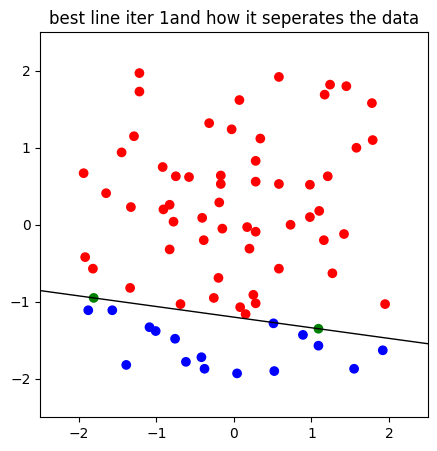

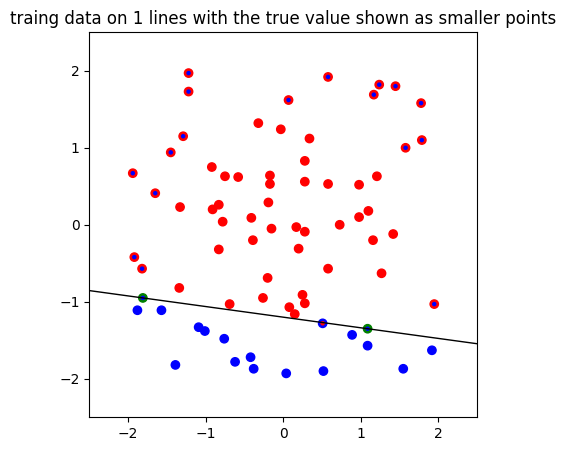

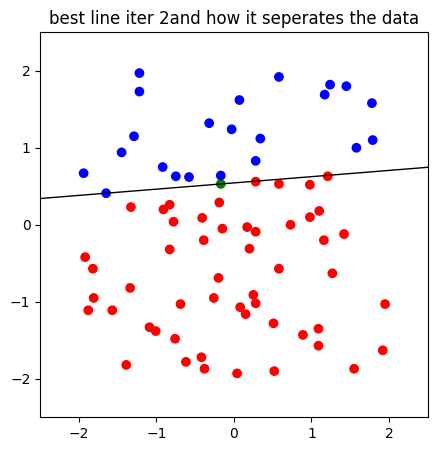

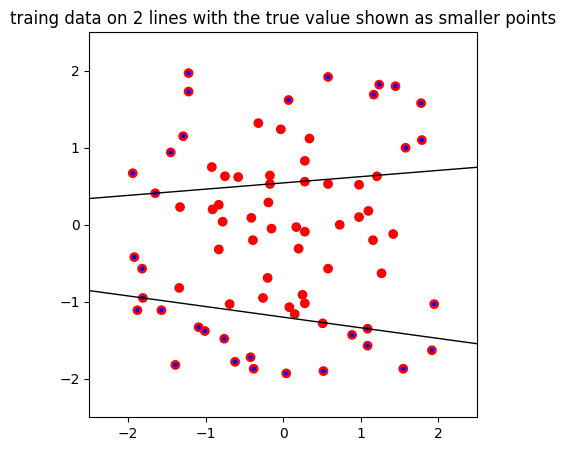

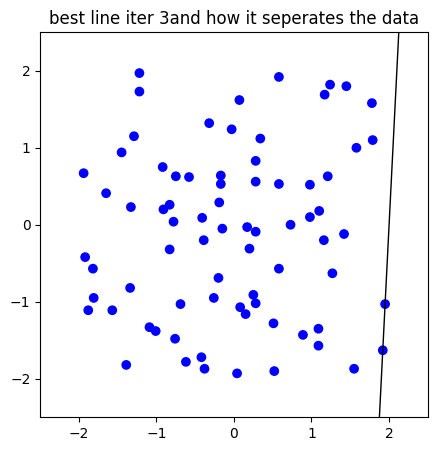

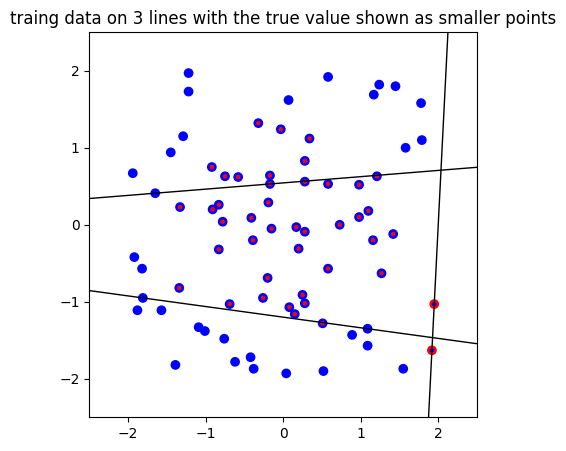

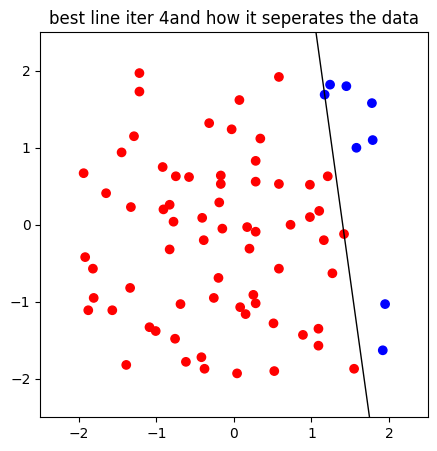

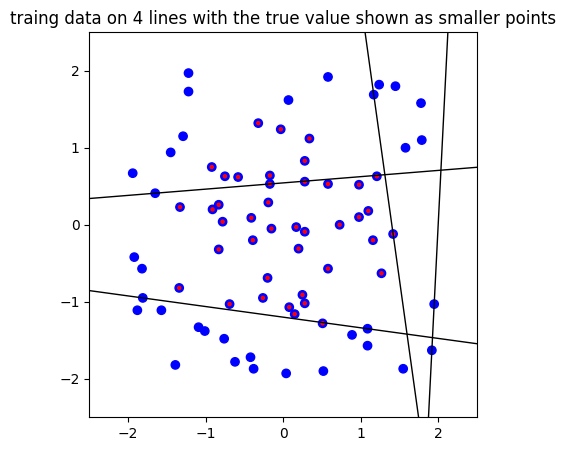

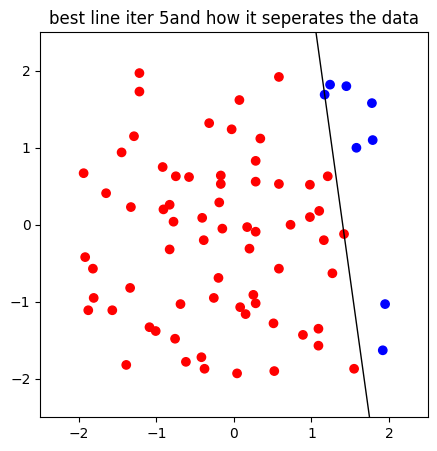

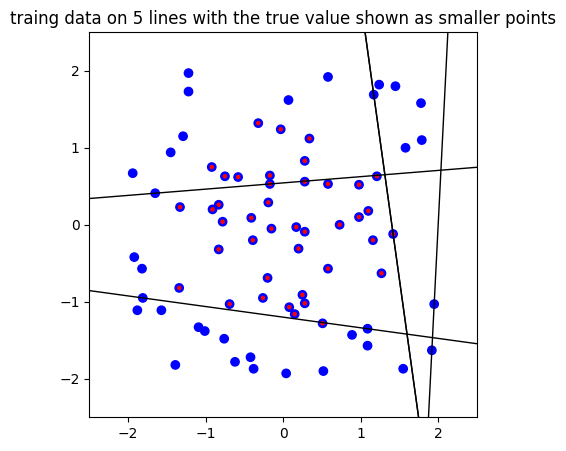

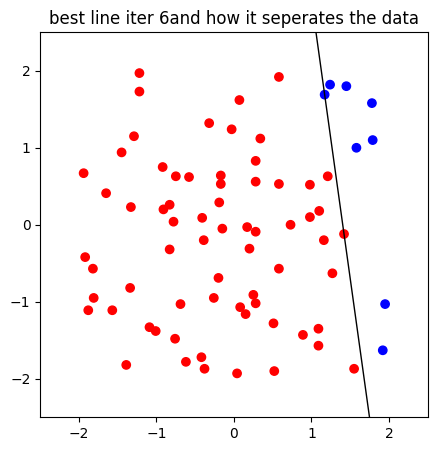

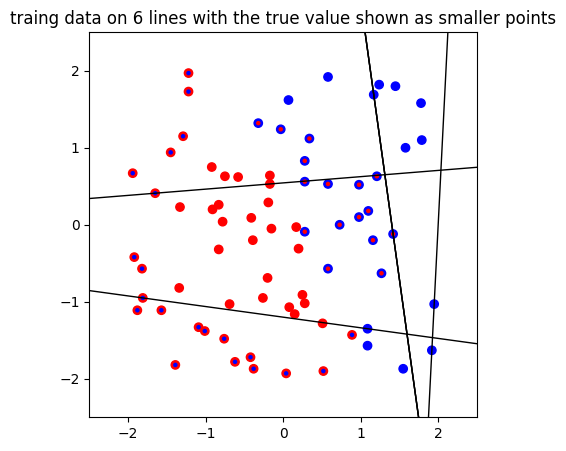

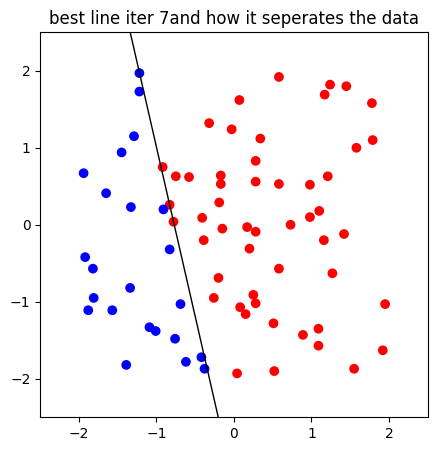

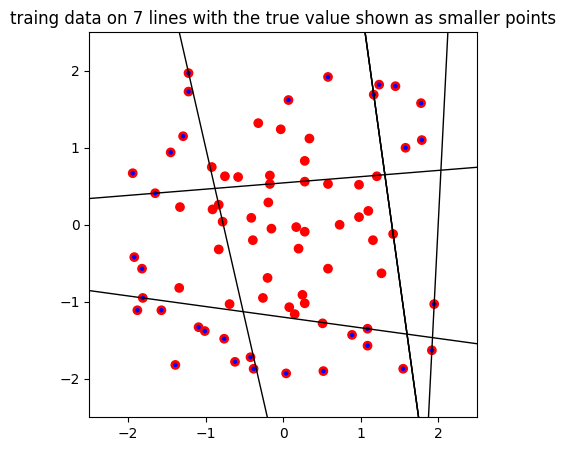

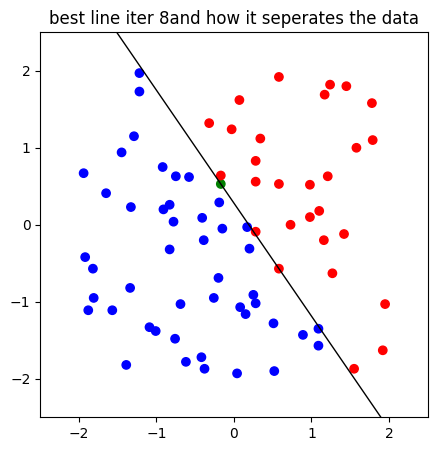

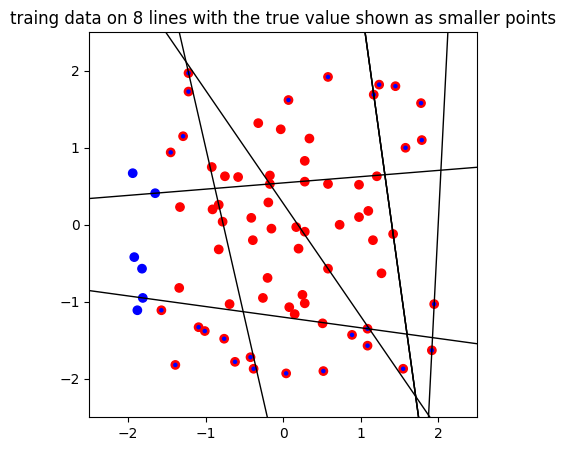

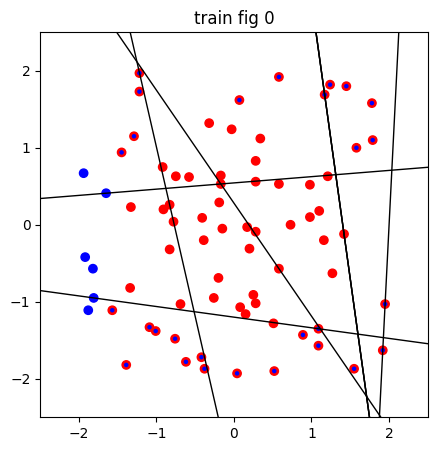

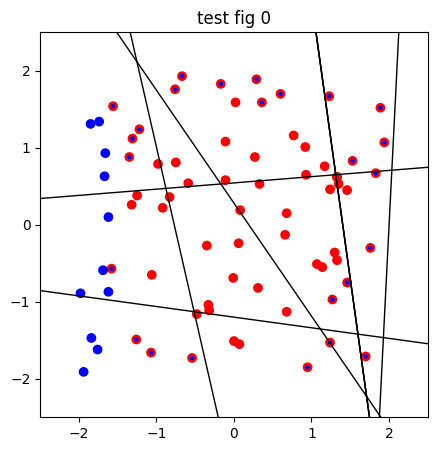

************
avg empirical_error:  [0.26666667 0.45333333 0.57333333 0.54666667 0.54666667 0.49333333
 0.45333333 0.37333333]
avg true errors:  [0.4        0.48       0.52       0.52       0.52       0.53333333
 0.48       0.33333333]
loading df


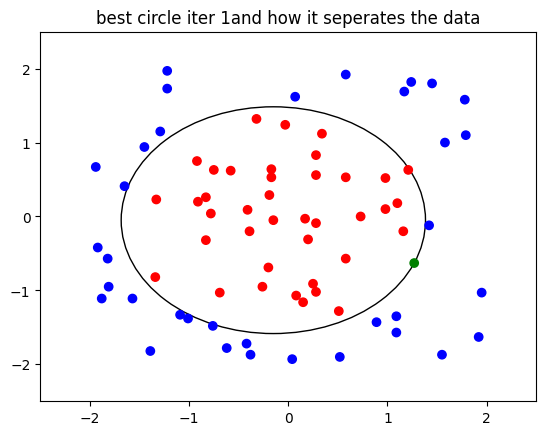

<Figure size 500x500 with 0 Axes>

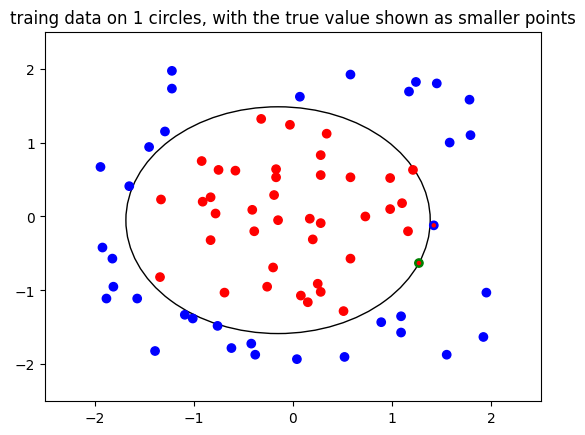

<Figure size 500x500 with 0 Axes>

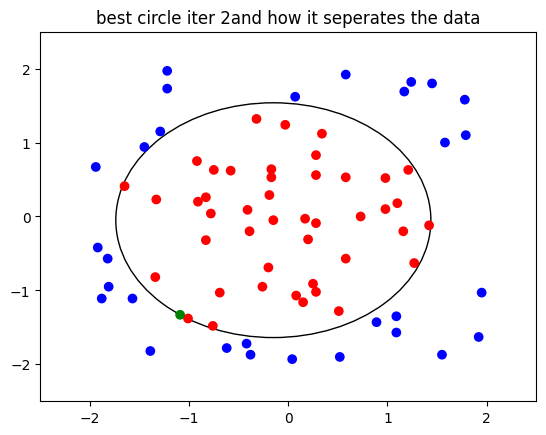

<Figure size 500x500 with 0 Axes>

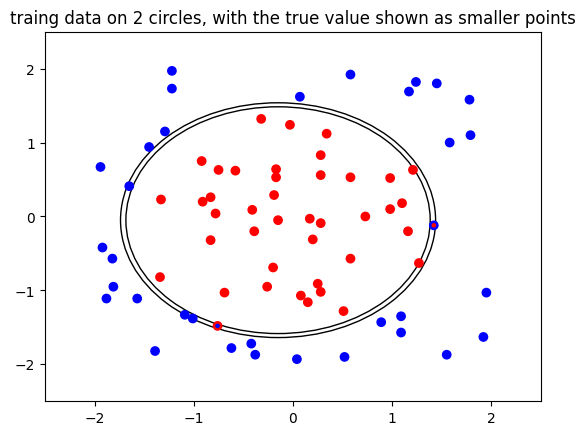

<Figure size 500x500 with 0 Axes>

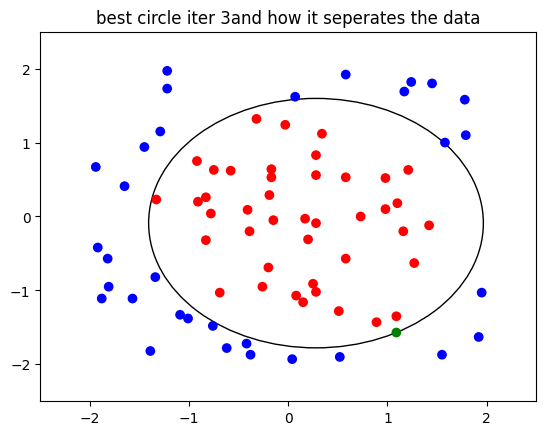

<Figure size 500x500 with 0 Axes>

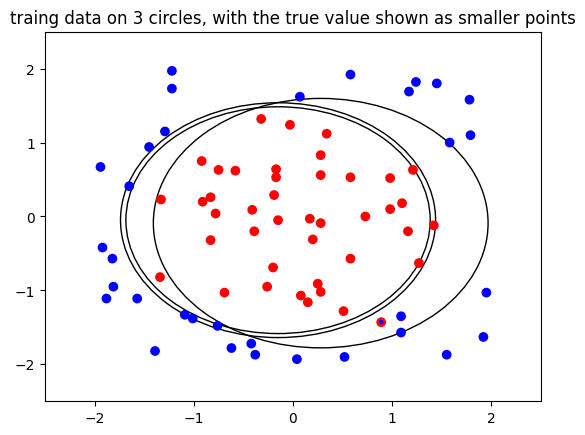

<Figure size 500x500 with 0 Axes>

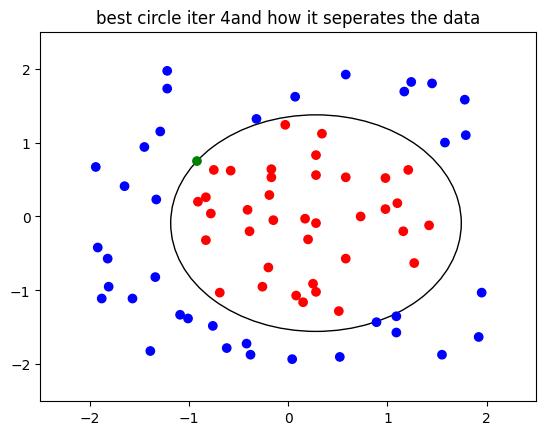

<Figure size 500x500 with 0 Axes>

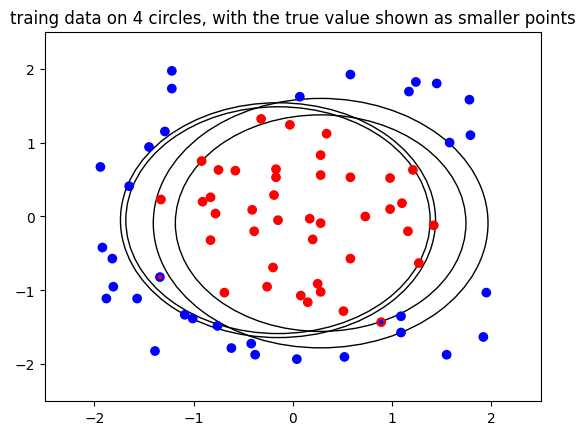

<Figure size 500x500 with 0 Axes>

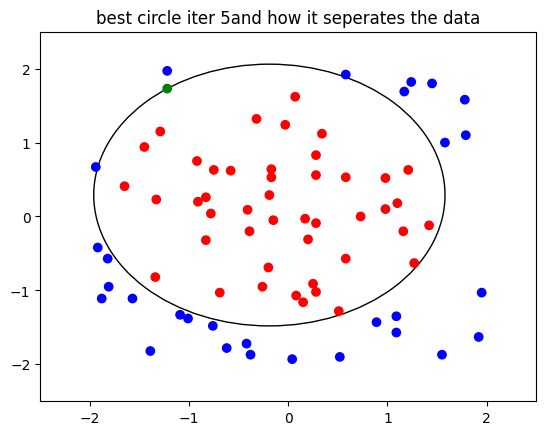

<Figure size 500x500 with 0 Axes>

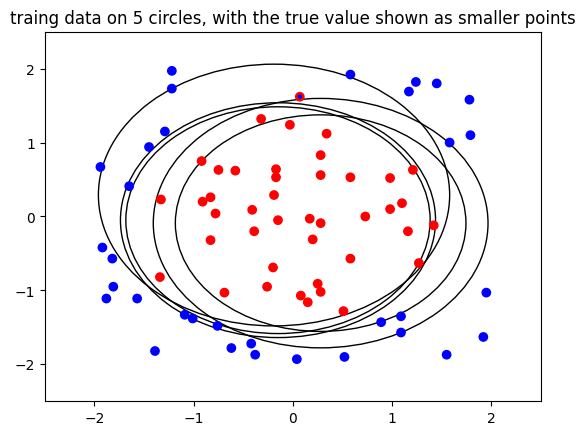

<Figure size 500x500 with 0 Axes>

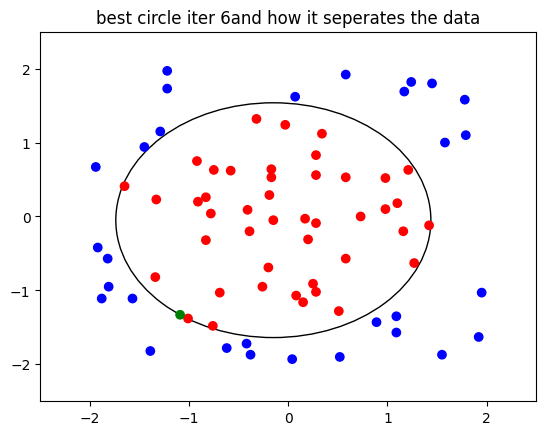

<Figure size 500x500 with 0 Axes>

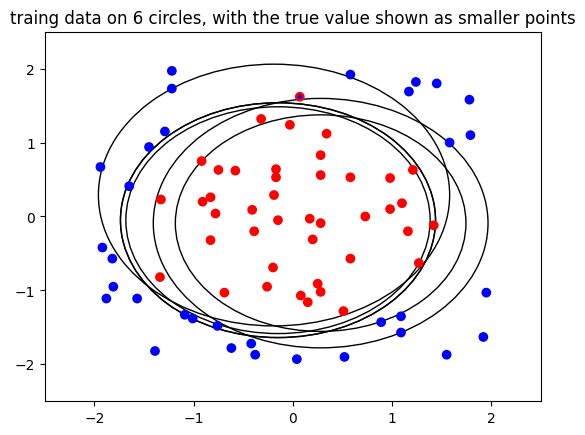

<Figure size 500x500 with 0 Axes>

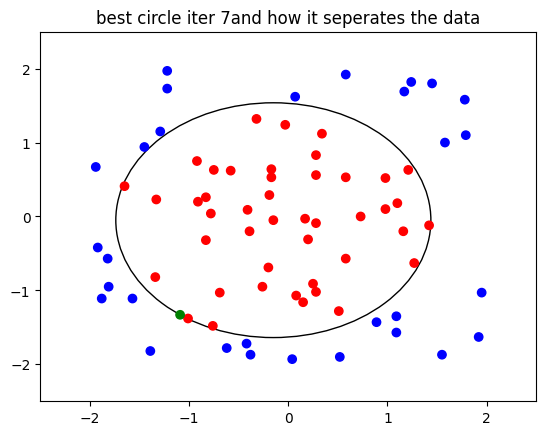

<Figure size 500x500 with 0 Axes>

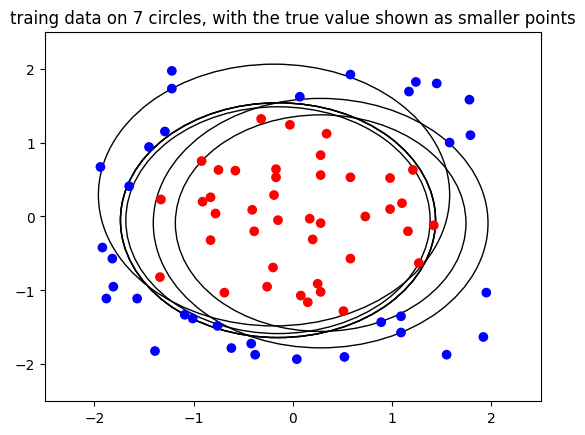

<Figure size 500x500 with 0 Axes>

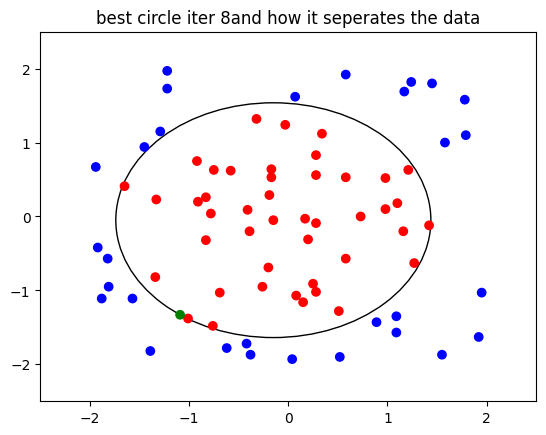

<Figure size 500x500 with 0 Axes>

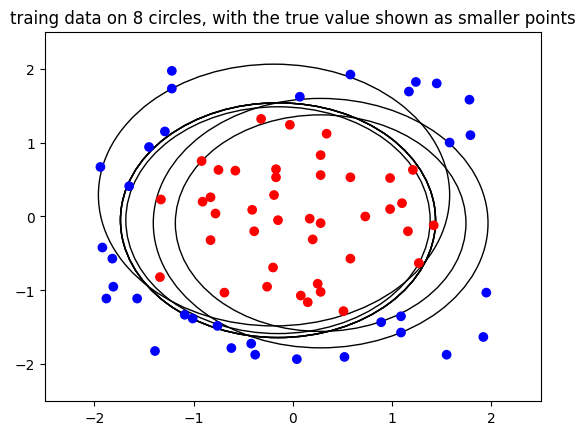

<Figure size 500x500 with 0 Axes>

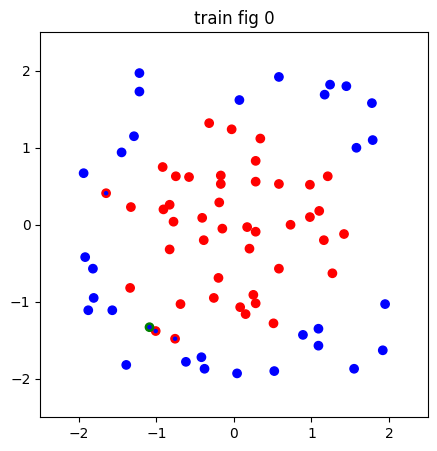

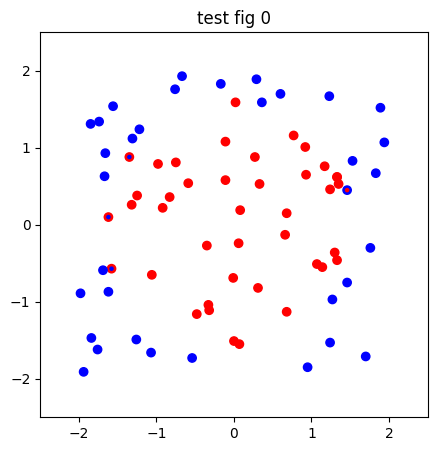

************
avg empirical_error:  [0.02666667 0.02666667 0.01333333 0.02666667 0.01333333 0.01333333
 0.         0.        ]
avg true errors:  [0.13333333 0.10666667 0.04       0.04       0.04       0.04
 0.02666667 0.05333333]


In [2]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Function to load the data and preprocess it
def load_and_preprocess_data(file_path):
    print("loading df")
    # Assuming the data is in a CSV format and the last column is the label
    data = pd.read_csv(file_path, sep=" ", header=None)
    # Last column is the label, the rest are features
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    return X, y



# Function to define the set of all lines formed by pairs of points
def define_lines(S):
    # print("creating lines")
    lines = []
    for (x1, y1), (x2, y2) in combinations(S, 2):
        # Calculate the coefficients of the line
        if x2 - x1 != 0:
            m = ((y2 - y1) / (x2 - x1))
        else:
            m = 0
        b = ((y1 - m * x1))
        # add both lines
        lines.append([m, b, -1])
        lines.append([m, b, 1])
    return lines

# Function to define the set of all circles formed by pairs of points
def define_circle(S):
    circles = []
    for (x1, y1), (x2, y2) in combinations(S, 2):
        # calc the radius
        r = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        # add both circles
        circles.append([x1, y1, r, -1])
        circles.append([x1, y1, r, 1])
    return circles

# Function to compute the margin of a point from a line
def margin_from_line(point, line):
    x, y = point
    m, b, sign = line
    return sign * (y - (m * x + b))

# Function to compute the margin of a point from a circle
def margin_from_circle(point, circle):
    x2, y2 = point
    x, y, r, sign = circle
    dist = np.sqrt((x2 - x) ** 2 + (y2 - y) ** 2)
    return sign * (r-dist)


def color_list(l):
    color_list=[]
    for i in l:
        if i>0:
            color_list.append("red")
        elif i<0:
            color_list.append("blue")
        else:
            color_list.append("green")
    return color_list


def add_lists(l1, l2):
    l = []
    for i in range(len(l1)):
        l.append(l1[i] + l2[i])
    return l



def show_graphs1(S, predictions,best_line,k,alphas,classifiers,y):
    predictions1 = np.sign([alphas[-1] * margin_from_line(point, classifiers[-1]) for point in S])
    xx1 = []
    yy1 = []
    size = []
    for j in S:
        xx1.append(j[0])
        yy1.append(j[1])
        size.append(20)

    plt.figure(figsize=(5, 5))
    plt.scatter(xx1, yy1, c=color_list(predictions1))

    y1 = 0 * best_line[0] + best_line[1]
    y2 = 1 * best_line[0] + best_line[1]
    plt.axline((0, y1), (1, y2), linewidth=1, color='black')
    t = "best line iter "
    t += str(k+1)
    t += "and how it seperates the data"
    plt.title(t)
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    plt.show()

    xx1 = []
    yy1 = []
    size = []
    for j in S:
        xx1.append(j[0])
        yy1.append(j[1])
        size.append(20)
    plt.figure(figsize=(5, 5))
    plt.scatter(xx1, yy1, c=color_list(predictions), )
    plt.scatter(xx1, yy1, c=color_list(y), marker='.', s=size)
    for j in classifiers:
        y1 = 0 * j[0] + j[1]
        y2 = 1 * j[0] + j[1]
        plt.axline((0, y1), (1, y2), linewidth=1, color='black')
    t = "traing data on "
    t += str(k + 1)
    t += " lines with the true value shown as smaller points"
    plt.title(t)
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    plt.show()


def show_graphs2(S,alphas,classifiers,y_S,i,T,y_T):
    pred = [0] * len(S)
    for j in range(len(alphas)):
        predictions = ([alphas[j] * margin_from_line(point, classifiers[j]) for point in S])
        pred = add_lists(pred, predictions)
    final_prediction = np.sign(pred)

    xx1 = []
    yy1 = []
    size = []
    for j in S:
        xx1.append(j[0])
        yy1.append(j[1])
        size.append(20)
    plt.figure(figsize=(5, 5))
    plt.scatter(xx1, yy1, c=color_list(final_prediction))
    plt.scatter(xx1, yy1, c=color_list(y_S), marker='.',s=size)
    for j in classifiers:
        y1 = 0 * j[0] + j[1]
        y2 = 1 * j[0] + j[1]
        plt.axline((0, y1), (1, y2), linewidth=1, color='black')
    t = "train fig "
    t += str(i)
    plt.title(t)
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    
    plt.show()

    pred = [0] * len(T)
    for j in range(len(alphas)):
        predictions = ([alphas[j] * margin_from_line(point, classifiers[j]) for point in T])
        pred = add_lists(pred, predictions)

    final_prediction = np.sign(pred)

    xx2 = []
    yy2 = []
    for j in T:
        xx2.append(j[0])
        yy2.append(j[1])
    plt.figure(figsize=(5, 5))
    plt.scatter(xx2, yy2, c=color_list(final_prediction))
    plt.scatter(xx2, yy2, c=color_list(y_T), marker='.',s=size)
    for j in classifiers:
        y1 = 0 * j[0] + j[1]
        y2 = 1 * j[0] + j[1]
        plt.axline((0, y1), (1, y2), linewidth=1, color='black')
    t = "test fig "
    t += str(i)
    plt.title(t)
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    plt.show()


def show_graphs3(S, predictions,best_circle,k,alphas,classifiers,y_test):

    predictions1 = np.sign([alphas[-1] * margin_from_circle(point, classifiers[-1]) for point in S])
    xx1 = []
    yy1 = []
    size = []
    for j in S:
        xx1.append(j[0])
        yy1.append(j[1])
        size.append(20)
    figure, axes = plt.subplots()
    x,y,r,sign =best_circle
    Drawing_uncolored_circle = plt.Circle((x, y),r, fill=False)
    axes.add_artist(Drawing_uncolored_circle)
    axes.scatter(xx1, yy1, c=color_list(predictions1))

    t = "best circle iter "
    t += str(k+1)
    t += "and how it seperates the data"
    plt.title(t)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.figure(figsize=(5, 5))
    plt.show()


    xx1 = []
    yy1 = []
    size = []
    for j in S:
        xx1.append(j[0])
        yy1.append(j[1])
        size.append(20)

    figure, axes = plt.subplots()
    for j in classifiers:
        x, y, r, sign = j
        Drawing_uncolored_circle = plt.Circle((x, y), r, fill=False)
        axes.add_artist(Drawing_uncolored_circle)
    axes.scatter(xx1, yy1, c=color_list(predictions))
    axes.scatter(xx1, yy1, c=color_list(y_test), marker='.',s=size)

    t = "traing data on "
    t += str(k + 1)
    t += " circles, with the true value shown as smaller points"
    plt.title(t)
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    plt.figure(figsize=(5, 5))
    plt.show()


def show_graphs4(S,alphas,classifiers,y_S,i,T,y_T):
    pred = [0] * len(S)
    for j in range(len(alphas)):
        predictions = ([alphas[j] * margin_from_circle(point, classifiers[j]) for point in S])
        pred = add_lists(pred, predictions)
    final_prediction = np.sign(pred)

    xx1 = []
    yy1 = []
    size=[]
    for j in S:
        xx1.append(j[0])
        yy1.append(j[1])
        size.append(20)
    plt.figure(figsize=(5, 5))
    plt.scatter(xx1, yy1, c=color_list(predictions))
    plt.scatter(xx1, yy1, c=color_list(y_S), marker='.',s=size)
    t = "train fig "
    t += str(i)
    plt.title(t)
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    plt.show()

    pred = [0] * len(T)
    for j in range(len(alphas)):
        predictions = ([alphas[j] * margin_from_circle(point, classifiers[j]) for point in T])
        pred = add_lists(pred, predictions)
    final_prediction = np.sign(pred)

    xx2 = []
    yy2 = []
    for j in T:
        xx2.append(j[0])
        yy2.append(j[1])
    plt.figure(figsize=(5,5))
    plt.scatter(xx2, yy2, c=color_list(final_prediction))
    plt.scatter(xx2, yy2, c=color_list(y_T), marker='.',s=size)
    t = "test fig "
    t += str(i)
    plt.title(t)
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    plt.show()



# Adaboost step to select the best line based on weights
def adaboost_select_line(S, y, D, lines):
    best_line = None
    min_error = float('inf')
    for line in lines:
        # Calculate weighted error for this line
        predictions = np.sign([margin_from_line(point, line) for point in S])  # pos=above, neg=below, 0=on
        weighted_error = np.sum(D[predictions != y])
        # Update best line if this one is better
        if weighted_error < min_error:
            min_error = weighted_error
            best_line = line
    return best_line, min_error


# Adaboost step to select the best circle based on weights
def adaboost_select_circle(S, y, D, circles):
    best_circle = None
    min_error = float('inf')
    for circle in circles:
        # Calculate weighted error for this circle
        predictions = np.sign([margin_from_circle(point, circle) for point in S])  # pos=above, neg=below, 0=on
        weighted_error = np.sum(D[predictions != y])
        # Update best circle if this one is better
        if weighted_error < min_error:
            min_error = weighted_error
            best_circle = circle
    return best_circle, min_error


# Adaboost algorithm to find the best set of lines and their weights
def adaboost_line(S, y, lines, T, y_test, num_iter=8):

    # Initialize weights
    D = np.full(len(S), 1 / len(S))
    # List to store classifiers and their weights
    classifiers = []
    alphas = []
    # Empirical and true error lists
    empirical_errors = []
    true_errors = []

    for k in range(num_iter):
        # Select the best line
        best_line, error = adaboost_select_line(S, y, D, lines)
        # Calculate alpha
        alpha = 0.5 * np.log((1 - error) / error)
        # Save the classifier and its weight
        classifiers.append(best_line)
        alphas.append(alpha)

        #calculte the errors
        pred = [0] * len(S)
        for j in range(len(alphas)):
            predictions = ([alphas[j] * margin_from_line(point, classifiers[j]) for point in S])
            pred = add_lists(pred, predictions)
        predictions = np.sign(pred)
        error_train = np.sum([predictions != y])/len(S)

        pred_test = [0] * len(T)
        for j in range(len(alphas)):
            predictions_test = ([alphas[j] * margin_from_line(point, classifiers[j]) for point in T])
            pred_test = add_lists(pred_test, predictions_test)
        predictions_test = np.sign(pred_test)
        error_test = np.sum([predictions_test != y_test])/len(T)
        empirical_errors.append(error_train)
        true_errors.append(error_test)

        # Update weights
        D *= np.exp(-alpha * y * predictions)
        D /= np.sum(D)  # Normalize

        show_graphs1(S, predictions, best_line, k, alphas, classifiers, y)
    return classifiers, alphas, empirical_errors, true_errors


# run adaboost X amount of times line
def execute_adaboost_runs_line(file_path, num_runs=50):

    # Load and preprocess data
    X, y = load_and_preprocess_data(file_path)
    avg_empirical_errors = np.zeros(8)
    avg_true_errors = np.zeros(8)
    avg = np.ones(8)*num_runs
    # Perform multiple runs of Adaboost
    for i in range(num_runs):
        # Split the data
        S, T, y_S, y_T = train_test_split(X, y, test_size=0.5, random_state=i)

        # Define the lines from training set
        lines = define_lines(S)
        # Run Adaboost
        classifiers, alphas, empirical_errors, true_errors = adaboost_line(S, y_S, lines, T, y_T, num_iter=8)
        avg_empirical_errors +=empirical_errors
        avg_true_errors +=true_errors
        show_graphs2(S,alphas,classifiers,y_S,i,T,y_T)
    print("************")
    print("avg empirical_error: ",avg_empirical_errors/avg)
    print("avg true errors: ",avg_true_errors/avg)


# run adaboost X amount of times line
def adaboost_circle(S, y, lines, T, y_test, num_iter=8):

    # Initialize weights
    D = np.full(len(S), 1 / len(S))

    # List to store classifiers and their weights
    classifiers = []
    alphas = []
    # Empirical and true error lists
    empirical_errors = []
    true_errors = []

    for k in range(num_iter):
        # Select the best line
        best_circle, error = adaboost_select_circle(S, y, D, lines)
        # Calculate alpha
        alpha = 0.5 * np.log((1 - error) / error)
        # Save the classifier and its weight
        classifiers.append(best_circle)
        alphas.append(alpha)

        # calvulate errors
        pred = [0] * len(S)
        for j in range(len(alphas)):
            predictions = ([alphas[j] * margin_from_circle(point, classifiers[j]) for point in S])
            pred = add_lists(pred, predictions)
        predictions = np.sign(pred)
        error_train = np.sum([predictions != y]) /len(S)

        pred_test = [0] * len(T)
        for j in range(len(alphas)):
            predictions_test = ([alphas[j] * margin_from_circle(point, classifiers[j]) for point in T])
            pred_test = add_lists(pred_test, predictions_test)
        predictions_test = np.sign(pred_test)
        error_test = np.sum([predictions_test != y_test])/len(T)

        empirical_errors.append(error_train)
        true_errors.append(error_test)

        # Update weights
        D *= np.exp(-alpha * y * predictions)
        D /= np.sum(D)  # NormalizeS

        show_graphs3(S, predictions, best_circle, k, alphas, classifiers, y)
    return classifiers, alphas, empirical_errors, true_errors

# run adaboost X amount of times circle
def execute_adaboost_runs_circle(file_path, num_runs=50):

    # Load and preprocess data
    X, y = load_and_preprocess_data(file_path)
    avg_empirical_errors = np.zeros(8)
    avg_true_errors = np.zeros(8)
    avg = np.ones(8) * num_runs
    # Perform multiple runs of Adaboost
    for i in range(num_runs):
        # Split the data
        S, T, y_S, y_T = train_test_split(X, y, test_size=0.5, random_state=i)

        # Define the lines from training set
        circles = define_circle(S)
        # Run Adaboost
        classifiers, alphas, empirical_errors, true_errors = adaboost_circle(S, y_S, circles, T, y_T, num_iter=8)
        avg_empirical_errors += empirical_errors
        avg_true_errors += true_errors
        show_graphs4(S,alphas,classifiers,y_S,i,T,y_T)
    print("************")
    print("avg empirical_error: ", avg_empirical_errors / avg)
    print("avg true errors: ", avg_true_errors / avg)


def main():
    execute_adaboost_runs_line('circle_separator.txt',1)
    execute_adaboost_runs_circle('circle_separator.txt',1)

if __name__ == '__main__':
    main()